In [2]:
!pip install numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.8 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import seaborn as sns


Thread Inactivity Analysis:
--------------------------------------------------

day_0:
ω (frequency): 15.85
T (temperature): 4.66
Required Stake: 296.55 CHOIR

day_30:
ω (frequency): 11.85
T (temperature): 2.83
Required Stake: 242.31 CHOIR

day_60:
ω (frequency): 11.10
T (temperature): 2.22
Required Stake: 204.21 CHOIR

day_90:
ω (frequency): 10.90
T (temperature): 1.92
Required Stake: 180.47 CHOIR


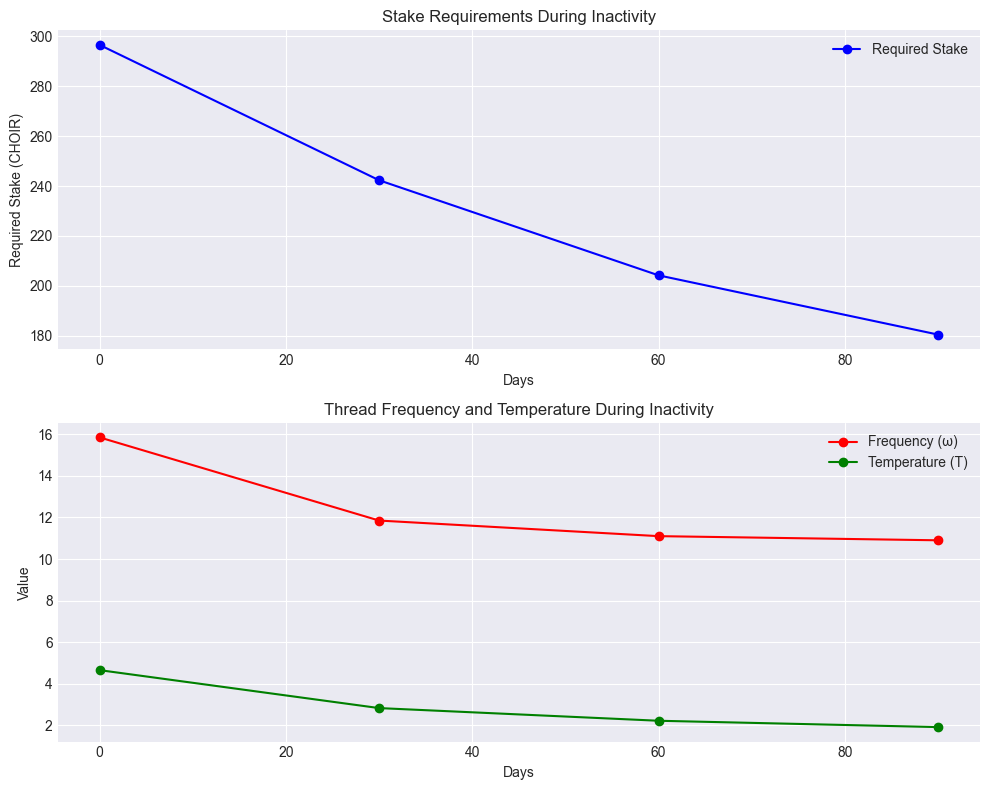

In [6]:
# Add to harmonic_curve.ipynb



@dataclass
class Thread:
    message_rate: float    # messages per day
    co_author_count: int   # number of co-authors
    token_balance: float   # total tokens in thread
    approval_rate: float   # 0-1, proportion of specs approved
    age_days: int         # thread age in days

def calculate_thread_frequency(thread: Thread) -> float:
    """Calculate ω (thread's natural frequency)"""
    α1, α2, α3 = 0.5, 2.0, 0.1  # Weighting coefficients

    return (
        α1 * thread.message_rate +
        α2 * thread.co_author_count +
        α3 * np.log1p(thread.token_balance)
    )

def calculate_thread_temperature(thread: Thread) -> float:
    """Calculate T (thread's temperature)"""
    β1, β2, β3 = 5.0, 0.02, 10.0  # Weighting coefficients

    token_velocity = thread.token_balance / max(thread.age_days, 1)

    return (
        β1 * (1 - thread.approval_rate) +
        β2 * token_velocity +
        β3 / (1 + thread.age_days)
    )

def calculate_stake_required(thread: Thread, S0: float = 100) -> float:
    """Calculate required stake using quantum harmonic oscillator formula"""
    ω = calculate_thread_frequency(thread)
    T = calculate_thread_temperature(thread)
    ℏ = 1.0  # Platform coupling constant

    # Add dampening factor to prevent extreme values
    damping = 0.1
    ω_damped = ω * damping

    exp_term = np.exp(ω_damped/T) - 1
    if exp_term <= 0:
        return S0 * 0.5  # Minimum stake

    # Add upper bound to prevent excessive stakes
    stake = S0 * (0.5 + 1/exp_term)
    return min(stake, S0 * 5.0)  # Cap at 5x base stake

# Model a thread becoming inactive
active_to_inactive = {
    "day_0": Thread(
        message_rate=10,    # Active discussion
        co_author_count=5,
        token_balance=5000,
        approval_rate=0.8,
        age_days=30
    ),
    "day_30": Thread(
        message_rate=2,     # Activity dropping
        co_author_count=5,
        token_balance=5000,
        approval_rate=0.8,
        age_days=60
    ),
    "day_60": Thread(
        message_rate=0.5,   # Nearly inactive
        co_author_count=5,
        token_balance=5000,
        approval_rate=0.8,
        age_days=90
    ),
    "day_90": Thread(
        message_rate=0.1,   # Inactive
        co_author_count=5,
        token_balance=5000,
        approval_rate=0.8,
        age_days=120
    )
}

# Calculate and display stakes over time
print("\nThread Inactivity Analysis:")
print("-" * 50)
for day, thread in active_to_inactive.items():
    stake = calculate_stake_required(thread)
    ω = calculate_thread_frequency(thread)
    T = calculate_thread_temperature(thread)
    print(f"\n{day}:")
    print(f"ω (frequency): {ω:.2f}")
    print(f"T (temperature): {T:.2f}")
    print(f"Required Stake: {stake:.2f} CHOIR")

# Let's also visualize this evolution
import matplotlib.pyplot as plt

days = [0, 30, 60, 90]
stakes = [calculate_stake_required(thread) for thread in active_to_inactive.values()]
frequencies = [calculate_thread_frequency(thread) for thread in active_to_inactive.values()]
temperatures = [calculate_thread_temperature(thread) for thread in active_to_inactive.values()]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot stake requirements over time
ax1.plot(days, stakes, 'b-o', label='Required Stake')
ax1.set_xlabel('Days')
ax1.set_ylabel('Required Stake (CHOIR)')
ax1.set_title('Stake Requirements During Inactivity')
ax1.grid(True)
ax1.legend()

# Plot frequency and temperature
ax2.plot(days, frequencies, 'r-o', label='Frequency (ω)')
ax2.plot(days, temperatures, 'g-o', label='Temperature (T)')
ax2.set_xlabel('Days')
ax2.set_ylabel('Value')
ax2.set_title('Thread Frequency and Temperature During Inactivity')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


Cascading Exit Analysis:
--------------------------------------------------

day_0:
Exits: 2 co-authors
Remaining co-authors: 8
ω (frequency): 20.42
T (temperature): 10.07
Required Stake: 494.67 CHOIR

day_7:
Exits: 3 co-authors
Remaining co-authors: 5
ω (frequency): 13.37
T (temperature): 10.21
Required Stake: 500.00 CHOIR

day_14:
Exits: 2 co-authors
Remaining co-authors: 3
ω (frequency): 8.64
T (temperature): 9.30
Required Stake: 500.00 CHOIR

day_21:
Exits: 1 co-authors
Remaining co-authors: 2
ω (frequency): 6.12
T (temperature): 7.94
Required Stake: 500.00 CHOIR


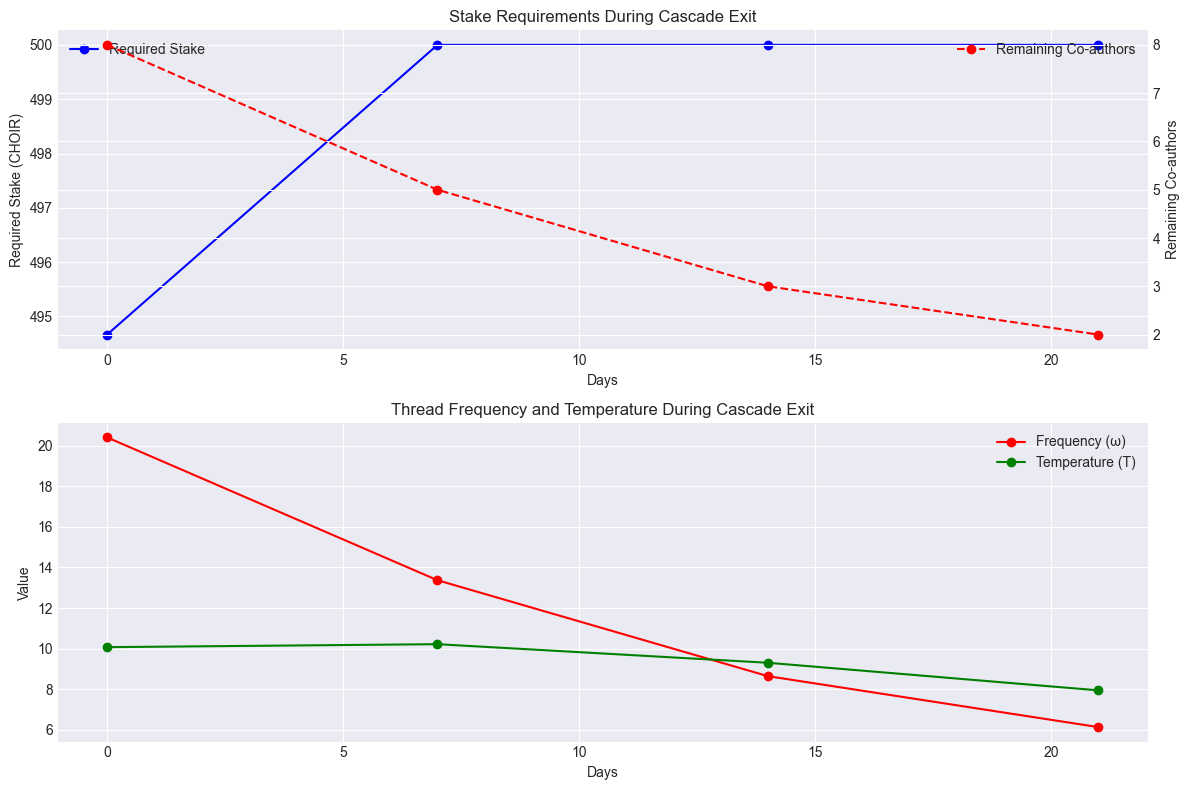

In [10]:
# Add to harmonic_curve.ipynb

def model_cascade_exit(thread: Thread, exit_sequence: list[int], days_between: int = 7):
    """Model a sequence of co-authors exiting over time"""
    cascade = {}
    current_thread = thread

    for day, exits in enumerate(exit_sequence):
        # Update thread state after exits
        current_thread = Thread(
            message_rate=max(current_thread.message_rate * 0.7, 0.1),  # Activity drops
            co_author_count=current_thread.co_author_count - exits,    # Authors leave
            token_balance=current_thread.token_balance,                # Balance maintained
            approval_rate=current_thread.approval_rate,
            age_days=current_thread.age_days + (day * days_between)
        )

        # Calculate new stake requirement
        stake = calculate_stake_required(current_thread)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        day_label = f"day_{day * days_between}"
        cascade[day_label] = {
            "thread": current_thread,
            "stake": stake,
            "frequency": ω,
            "temperature": T,
            "exits": exits
        }

    return cascade

# Model a cascade where co-authors exit over time
initial_thread = Thread(
    message_rate=10,        # Active thread
    co_author_count=10,     # Healthy community
    token_balance=10000,    # Significant value
    approval_rate=0.8,
    age_days=30
)

# Exit sequence: [2, 3, 2, 1] means 2 leave first, then 3, etc.
exit_sequence = [2, 3, 2, 1]  # Cascading exits
cascade = model_cascade_exit(initial_thread, exit_sequence)

# Display results and plot
print("\nCascading Exit Analysis:")
print("-" * 50)
for day, data in cascade.items():
    print(f"\n{day}:")
    print(f"Exits: {data['exits']} co-authors")
    print(f"Remaining co-authors: {data['thread'].co_author_count}")
    print(f"ω (frequency): {data['frequency']:.2f}")
    print(f"T (temperature): {data['temperature']:.2f}")
    print(f"Required Stake: {data['stake']:.2f} CHOIR")

# Visualization
days = [int(day.split('_')[1]) for day in cascade.keys()]
stakes = [data['stake'] for data in cascade.values()]
frequencies = [data['frequency'] for data in cascade.values()]
temperatures = [data['temperature'] for data in cascade.values()]
remaining = [data['thread'].co_author_count for data in cascade.values()]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot stake requirements and remaining co-authors
ax1.plot(days, stakes, 'b-o', label='Required Stake')
ax1_twin = ax1.twinx()
ax1_twin.plot(days, remaining, 'r--o', label='Remaining Co-authors')
ax1.set_xlabel('Days')
ax1.set_ylabel('Required Stake (CHOIR)')
ax1_twin.set_ylabel('Remaining Co-authors')
ax1.set_title('Stake Requirements During Cascade Exit')
ax1.grid(True)
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Plot frequency and temperature
ax2.plot(days, frequencies, 'r-o', label='Frequency (ω)')
ax2.plot(days, temperatures, 'g-o', label='Temperature (T)')
ax2.set_xlabel('Days')
ax2.set_ylabel('Value')
ax2.set_title('Thread Frequency and Temperature During Cascade Exit')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [11]:
def model_post_cascade_recovery(thread: Thread, recovery_days: int = 30):
    """Model thread stabilizing after cascade"""
    recovery = {}
    current_thread = thread

    for day in range(0, recovery_days, 7):
        # Temperature gradually normalizes
        current_thread = Thread(
            message_rate=current_thread.message_rate,
            co_author_count=current_thread.co_author_count,
            token_balance=current_thread.token_balance,
            approval_rate=current_thread.approval_rate,
            age_days=current_thread.age_days + 7
        )

        stake = calculate_stake_required(current_thread)
        recovery[f"recovery_day_{day}"] = {
            "stake": stake,
            "frequency": calculate_thread_frequency(current_thread),
            "temperature": calculate_thread_temperature(current_thread)
        }

    return recovery

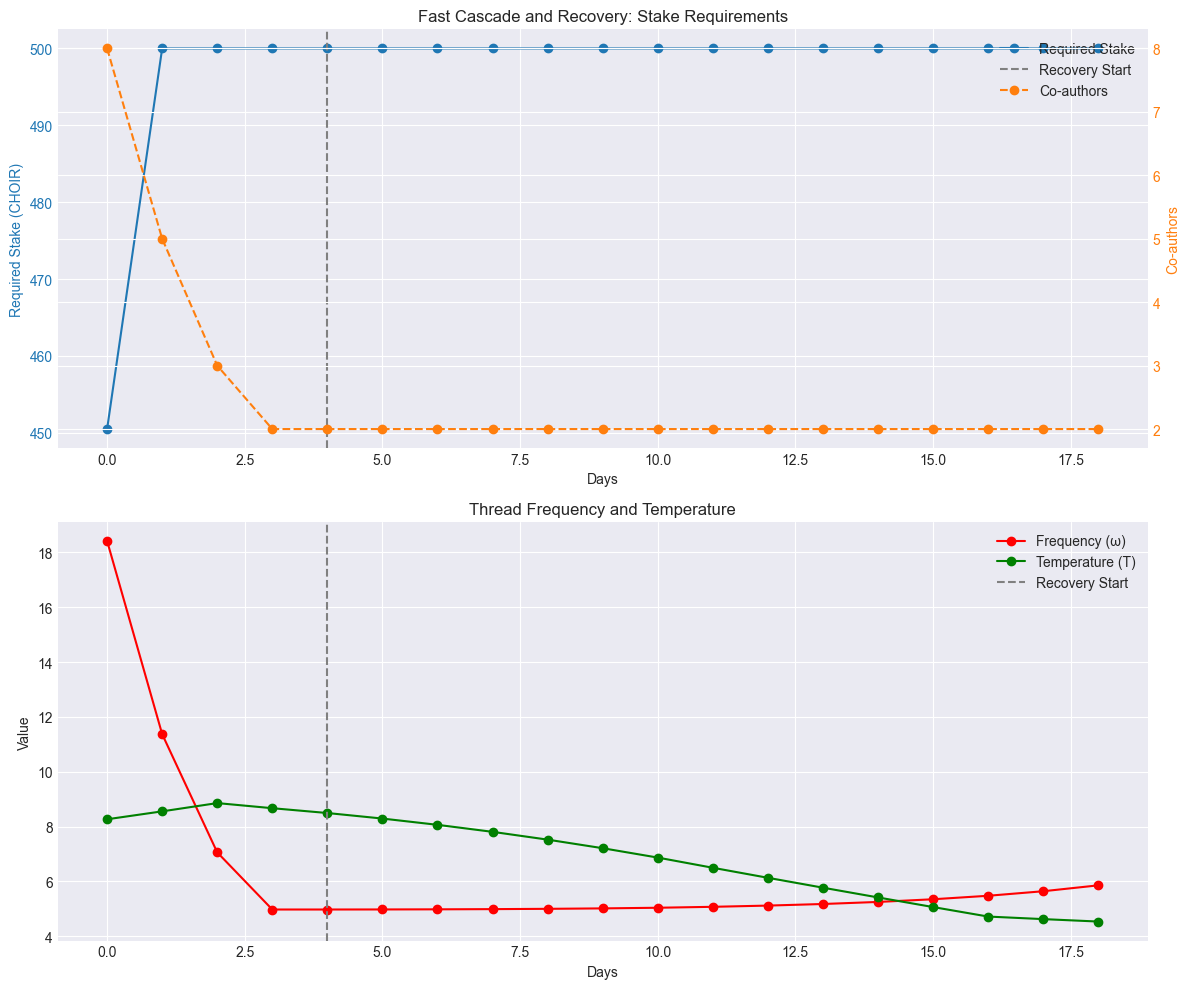


Fast Cascade and Recovery Analysis:
--------------------------------------------------

cascade_0:
ω (frequency): 18.42
T (temperature): 8.26
Required Stake: 450.48 CHOIR
Co-authors: 8

cascade_1:
ω (frequency): 11.37
T (temperature): 8.55
Required Stake: 500.00 CHOIR
Co-authors: 5

cascade_2:
ω (frequency): 7.06
T (temperature): 8.85
Required Stake: 500.00 CHOIR
Co-authors: 3

cascade_3:
ω (frequency): 4.97
T (temperature): 8.67
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_0:
ω (frequency): 4.97
T (temperature): 8.49
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_1:
ω (frequency): 4.97
T (temperature): 8.29
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_2:
ω (frequency): 4.98
T (temperature): 8.06
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_3:
ω (frequency): 4.98
T (temperature): 7.81
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_4:
ω (frequency): 5.00
T (temperature): 7.52
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_5:
ω (frequency): 5.01

In [15]:
def model_fast_cascade_and_recovery(thread: Thread, exit_sequence: list[int], recovery_days: int = 15):
    """Model rapid cascade and recovery"""
    timeline = {}
    current_thread = thread

    # Fast cascade (1 day between exits)
    for day, exits in enumerate(exit_sequence):
        current_thread = Thread(
            message_rate=max(current_thread.message_rate * 0.3, 0.1),  # Sharper drop
            co_author_count=current_thread.co_author_count - exits,
            token_balance=current_thread.token_balance,
            approval_rate=max(current_thread.approval_rate - 0.1, 0.5),  # Approval drops
            age_days=current_thread.age_days + 1
        )

        stake = calculate_stake_required(current_thread)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        timeline[f"cascade_{day}"] = {
            "day": day,
            "stake": stake,
            "frequency": ω,
            "temperature": T,
            "co_authors": current_thread.co_author_count,
            "phase": "cascade"
        }

    cascade_end = len(exit_sequence)

    # Fast recovery (1 day intervals)
    for day in range(recovery_days):
        recovery_factor = min(1.0, day/7)  # Full recovery possible in 7 days

        current_thread = Thread(
            message_rate=max(0.1, current_thread.message_rate * (1 + 0.3 * recovery_factor)),
            co_author_count=current_thread.co_author_count,
            token_balance=current_thread.token_balance,
            approval_rate=min(0.95, current_thread.approval_rate + 0.05 * recovery_factor),
            age_days=current_thread.age_days + 1
        )

        stake = calculate_stake_required(current_thread)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        timeline[f"recovery_{day}"] = {
            "day": cascade_end + day,
            "stake": stake,
            "frequency": ω,
            "temperature": T,
            "co_authors": current_thread.co_author_count,
            "phase": "recovery"
        }

    return timeline

# Test with faster dynamics
initial_thread = Thread(
    message_rate=10,
    co_author_count=10,
    token_balance=10000,
    approval_rate=0.8,
    age_days=30
)

exit_sequence = [2, 3, 2, 1]
timeline = model_fast_cascade_and_recovery(initial_thread, exit_sequence)

# Prepare plot data
days = [data["day"] for data in timeline.values()]
stakes = [data["stake"] for data in timeline.values()]
frequencies = [data["frequency"] for data in timeline.values()]
temperatures = [data["temperature"] for data in timeline.values()]
co_authors = [data["co_authors"] for data in timeline.values()]
phases = [data["phase"] for data in timeline.values()]

# Create visualization
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Stake and Co-authors
color1, color2 = '#1f77b4', '#ff7f0e'
ax1.plot(days, stakes, '-o', color=color1, label='Required Stake')
ax1_twin = ax1.twinx()
ax1_twin.plot(days, co_authors, '--o', color=color2, label='Co-authors')

# Add cascade/recovery boundary
cascade_end = len(exit_sequence)
ax1.axvline(x=cascade_end, color='gray', linestyle='--', label='Recovery Start')

ax1.set_xlabel('Days')
ax1.set_ylabel('Required Stake (CHOIR)', color=color1)
ax1_twin.set_ylabel('Co-authors', color=color2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1_twin.tick_params(axis='y', labelcolor=color2)
ax1.set_title('Fast Cascade and Recovery: Stake Requirements')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 2: Frequency and Temperature
ax2.plot(days, frequencies, '-o', color='red', label='Frequency (ω)')
ax2.plot(days, temperatures, '-o', color='green', label='Temperature (T)')
ax2.axvline(x=cascade_end, color='gray', linestyle='--', label='Recovery Start')

ax2.set_xlabel('Days')
ax2.set_ylabel('Value')
ax2.set_title('Thread Frequency and Temperature')
ax2.legend()

plt.tight_layout()
plt.show()

# Print analysis
print("\nFast Cascade and Recovery Analysis:")
print("-" * 50)
for key, data in timeline.items():
    print(f"\n{key}:")
    print(f"ω (frequency): {data['frequency']:.2f}")
    print(f"T (temperature): {data['temperature']:.2f}")
    print(f"Required Stake: {data['stake']:.2f} CHOIR")
    print(f"Co-authors: {data['co_authors']}")

In [13]:
def model_cascade_and_recovery(thread: Thread, exit_sequence: list[int], recovery_days: int = 30):
    """Model both cascade and recovery phases with faster dynamics"""
    cascade = {}
    current_thread = thread

    # Faster cascade (2 days between exits instead of 7)
    for day, exits in enumerate(exit_sequence):
        # Sharper activity drop and temperature spike
        current_thread = Thread(
            message_rate=max(current_thread.message_rate * 0.5, 0.1),  # Faster activity drop
            co_author_count=current_thread.co_author_count - exits,
            token_balance=current_thread.token_balance,
            approval_rate=current_thread.approval_rate,
            age_days=current_thread.age_days + (day * 2)  # 2 days between exits
        )

        day_label = f"day_{day * 2}"
        cascade[day_label] = {
            "thread": current_thread,
            "stake": calculate_stake_required(current_thread),
            "frequency": calculate_thread_frequency(current_thread),
            "temperature": calculate_thread_temperature(current_thread),
            "exits": exits
        }

    # Faster recovery (3 days between updates instead of 7)
    final_cascade_state = list(cascade.values())[-1]['thread']
    recovery = {}
    current_thread = final_cascade_state

    for day in range(0, recovery_days, 3):
        # Faster recovery factors
        recovery_factor = min(1.0, day/15)  # Full recovery possible in 15 days

        current_thread = Thread(
            message_rate=max(0.1, current_thread.message_rate * (1 + 0.2 * recovery_factor)),  # Faster activity recovery
            co_author_count=current_thread.co_author_count,
            token_balance=current_thread.token_balance,
            approval_rate=min(0.95, current_thread.approval_rate + 0.1 * recovery_factor),  # Faster approval recovery
            age_days=current_thread.age_days + 3
        )

        day_label = f"recovery_day_{day}"
        recovery[day_label] = {
            "thread": current_thread,
            "stake": calculate_stake_required(current_thread),
            "frequency": calculate_thread_frequency(current_thread),
            "temperature": calculate_thread_temperature(current_thread)
        }

    return {**cascade, **recovery}

# Test with faster dynamics
initial_thread = Thread(
    message_rate=10,
    co_author_count=10,
    token_balance=10000,
    approval_rate=0.8,
    age_days=30
)

exit_sequence = [2, 3, 2, 1]  # Same sequence, faster timing
timeline = model_cascade_and_recovery(initial_thread, exit_sequence, recovery_days=30)

# Display and plot results as before...

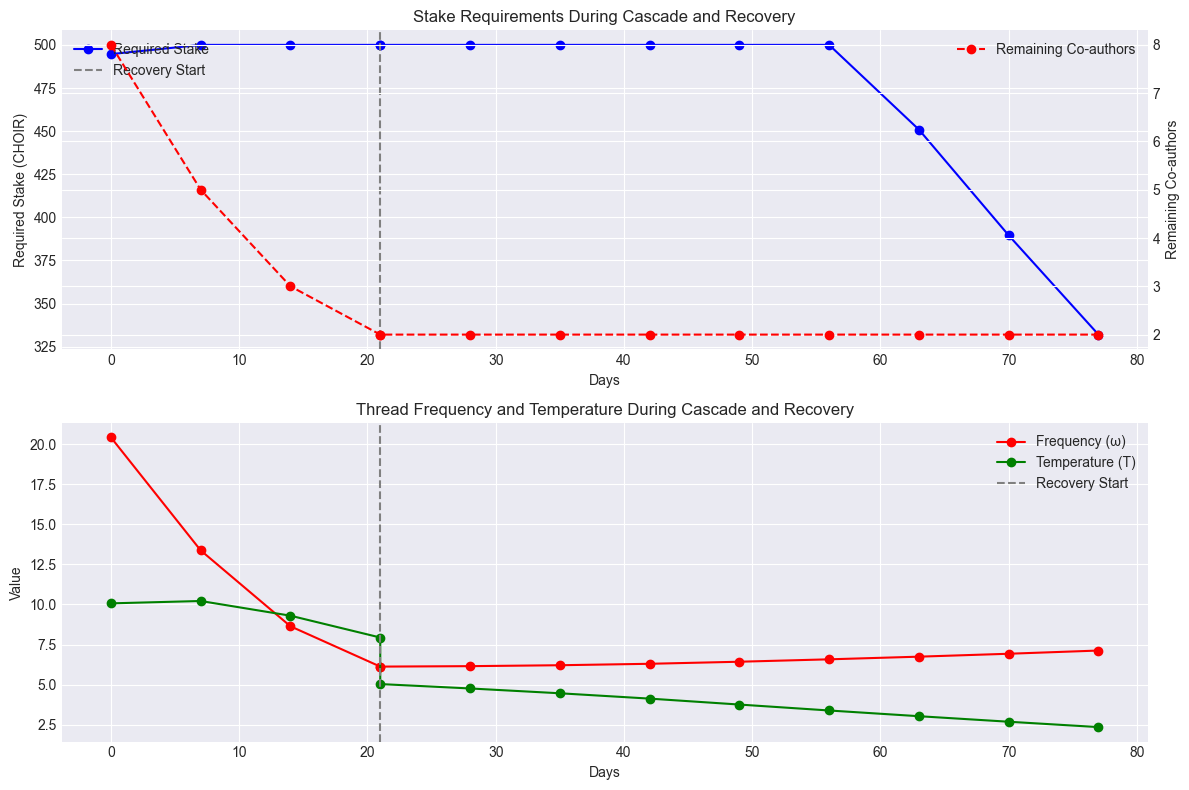


Cascade and Recovery Analysis:
--------------------------------------------------

day_0:
ω (frequency): 20.42
T (temperature): 10.07
Required Stake: 494.67 CHOIR
Exits: 2 co-authors
Remaining co-authors: 8

day_7:
ω (frequency): 13.37
T (temperature): 10.21
Required Stake: 500.00 CHOIR
Exits: 3 co-authors
Remaining co-authors: 5

day_14:
ω (frequency): 8.64
T (temperature): 9.30
Required Stake: 500.00 CHOIR
Exits: 2 co-authors
Remaining co-authors: 3

day_21:
ω (frequency): 6.12
T (temperature): 7.94
Required Stake: 500.00 CHOIR
Exits: 1 co-authors
Remaining co-authors: 2

recovery_day_0:
ω (frequency): 6.12
T (temperature): 5.03
Required Stake: 500.00 CHOIR
Remaining co-authors: 2

recovery_day_7:
ω (frequency): 6.15
T (temperature): 4.76
Required Stake: 500.00 CHOIR
Remaining co-authors: 2

recovery_day_14:
ω (frequency): 6.21
T (temperature): 4.46
Required Stake: 500.00 CHOIR
Remaining co-authors: 2

recovery_day_21:
ω (frequency): 6.30
T (temperature): 4.12
Required Stake: 500.00

In [14]:
# Add to harmonic_curve.ipynb

def model_cascade_and_recovery(thread: Thread, exit_sequence: list[int], recovery_days: int = 60):
    """Model both cascade and recovery phases"""
    # First model the cascade
    cascade = model_cascade_exit(thread, exit_sequence)

    # Get final thread state after cascade
    final_cascade_state = list(cascade.values())[-1]['thread']

    # Model recovery period
    recovery = {}
    current_thread = final_cascade_state

    for day in range(0, recovery_days, 7):
        # During recovery:
        # - Temperature gradually normalizes
        # - Message rate slowly recovers
        # - Co-author count stays constant
        recovery_factor = min(1.0, day/30)  # Gradual stabilization

        current_thread = Thread(
            message_rate=max(0.1, current_thread.message_rate * (1 + 0.1 * recovery_factor)),
            co_author_count=current_thread.co_author_count,
            token_balance=current_thread.token_balance,
            approval_rate=min(0.95, current_thread.approval_rate + 0.05 * recovery_factor),
            age_days=current_thread.age_days + 7
        )

        stake = calculate_stake_required(current_thread)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        day_label = f"recovery_day_{day}"
        recovery[day_label] = {
            "thread": current_thread,
            "stake": stake,
            "frequency": ω,
            "temperature": T
        }

    # Combine cascade and recovery data
    full_timeline = {**cascade, **recovery}
    return full_timeline

# Model full timeline
initial_thread = Thread(
    message_rate=10,
    co_author_count=10,
    token_balance=10000,
    approval_rate=0.8,
    age_days=30
)

exit_sequence = [2, 3, 2, 1]  # Same cascade pattern
timeline = model_cascade_and_recovery(initial_thread, exit_sequence)

# Visualization
days = []
stakes = []
frequencies = []
temperatures = []
remaining = []

for day, data in timeline.items():
    if 'recovery_day' in day:
        day_num = int(day.split('_')[2]) + 21  # Add cascade duration
    else:
        day_num = int(day.split('_')[1])

    days.append(day_num)
    stakes.append(data['stake'])
    frequencies.append(data['frequency'])
    temperatures.append(data['temperature'])
    remaining.append(data['thread'].co_author_count)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot stake requirements and remaining co-authors
ax1.plot(days, stakes, 'b-o', label='Required Stake')
ax1_twin = ax1.twinx()
ax1_twin.plot(days, remaining, 'r--o', label='Remaining Co-authors')
ax1.axvline(x=21, color='gray', linestyle='--', label='Recovery Start')
ax1.set_xlabel('Days')
ax1.set_ylabel('Required Stake (CHOIR)')
ax1_twin.set_ylabel('Remaining Co-authors')
ax1.set_title('Stake Requirements During Cascade and Recovery')
ax1.grid(True)
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Plot frequency and temperature
ax2.plot(days, frequencies, 'r-o', label='Frequency (ω)')
ax2.plot(days, temperatures, 'g-o', label='Temperature (T)')
ax2.axvline(x=21, color='gray', linestyle='--', label='Recovery Start')
ax2.set_xlabel('Days')
ax2.set_ylabel('Value')
ax2.set_title('Thread Frequency and Temperature During Cascade and Recovery')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Print analysis
print("\nCascade and Recovery Analysis:")
print("-" * 50)
for day, data in timeline.items():
    print(f"\n{day}:")
    print(f"ω (frequency): {data['frequency']:.2f}")
    print(f"T (temperature): {data['temperature']:.2f}")
    print(f"Required Stake: {data['stake']:.2f} CHOIR")
    if 'exits' in data:
        print(f"Exits: {data['exits']} co-authors")
    print(f"Remaining co-authors: {data['thread'].co_author_count}")

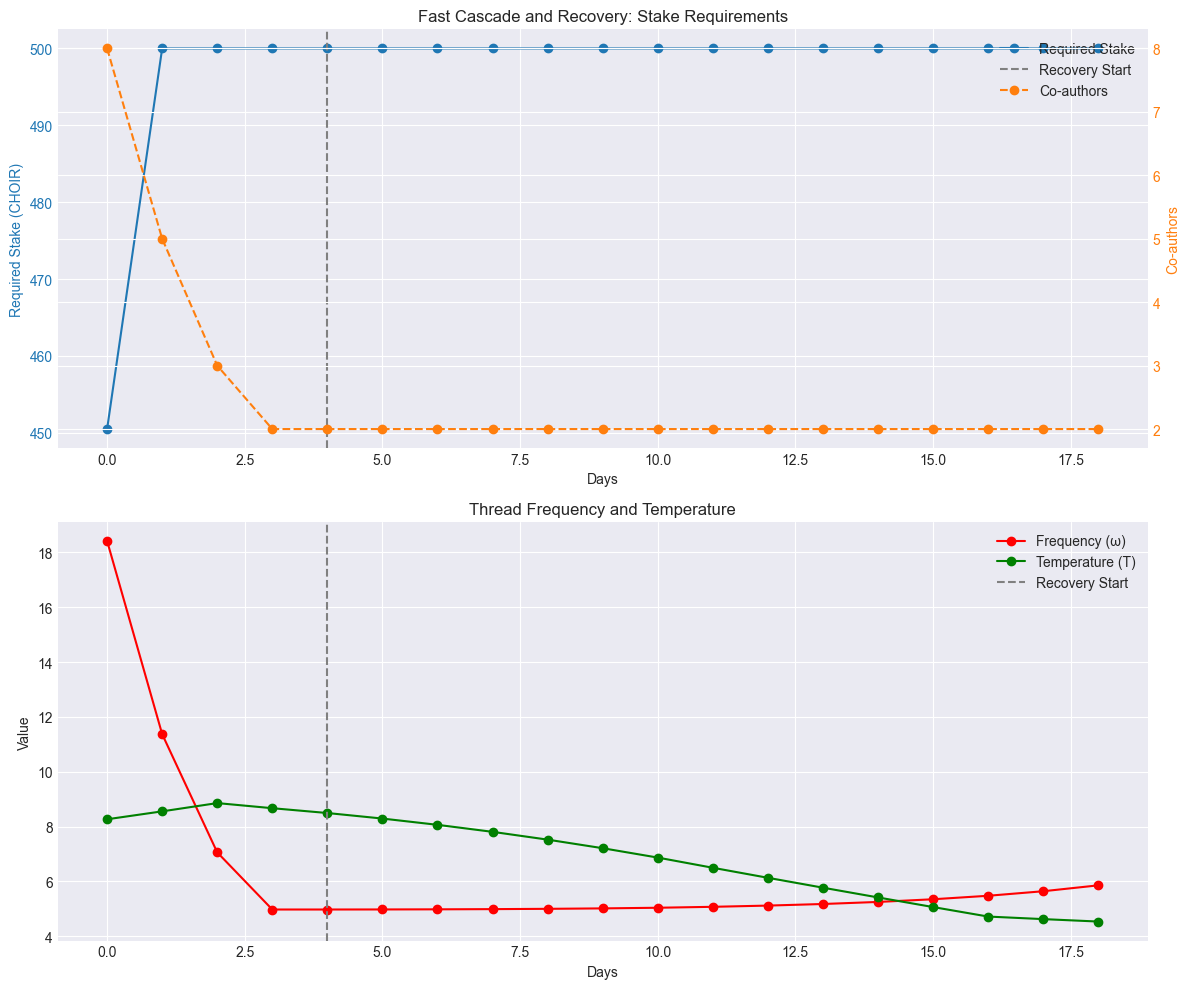


Fast Cascade and Recovery Analysis:
--------------------------------------------------

cascade_0:
ω (frequency): 18.42
T (temperature): 8.26
Required Stake: 450.48 CHOIR
Co-authors: 8

cascade_1:
ω (frequency): 11.37
T (temperature): 8.55
Required Stake: 500.00 CHOIR
Co-authors: 5

cascade_2:
ω (frequency): 7.06
T (temperature): 8.85
Required Stake: 500.00 CHOIR
Co-authors: 3

cascade_3:
ω (frequency): 4.97
T (temperature): 8.67
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_0:
ω (frequency): 4.97
T (temperature): 8.49
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_1:
ω (frequency): 4.97
T (temperature): 8.29
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_2:
ω (frequency): 4.98
T (temperature): 8.06
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_3:
ω (frequency): 4.98
T (temperature): 7.81
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_4:
ω (frequency): 5.00
T (temperature): 7.52
Required Stake: 500.00 CHOIR
Co-authors: 2

recovery_5:
ω (frequency): 5.01

In [16]:
def model_fast_cascade_and_recovery(thread: Thread, exit_sequence: list[int], recovery_days: int = 15):
    """Model rapid cascade and recovery"""
    timeline = {}
    current_thread = thread

    # Fast cascade (1 day between exits)
    for day, exits in enumerate(exit_sequence):
        current_thread = Thread(
            message_rate=max(current_thread.message_rate * 0.3, 0.1),  # Sharper drop
            co_author_count=current_thread.co_author_count - exits,
            token_balance=current_thread.token_balance,
            approval_rate=max(current_thread.approval_rate - 0.1, 0.5),  # Approval drops
            age_days=current_thread.age_days + 1
        )

        stake = calculate_stake_required(current_thread)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        timeline[f"cascade_{day}"] = {
            "day": day,
            "stake": stake,
            "frequency": ω,
            "temperature": T,
            "co_authors": current_thread.co_author_count,
            "phase": "cascade"
        }

    cascade_end = len(exit_sequence)

    # Fast recovery (1 day intervals)
    for day in range(recovery_days):
        recovery_factor = min(1.0, day/7)  # Full recovery possible in 7 days

        current_thread = Thread(
            message_rate=max(0.1, current_thread.message_rate * (1 + 0.3 * recovery_factor)),
            co_author_count=current_thread.co_author_count,
            token_balance=current_thread.token_balance,
            approval_rate=min(0.95, current_thread.approval_rate + 0.05 * recovery_factor),
            age_days=current_thread.age_days + 1
        )

        stake = calculate_stake_required(current_thread)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        timeline[f"recovery_{day}"] = {
            "day": cascade_end + day,
            "stake": stake,
            "frequency": ω,
            "temperature": T,
            "co_authors": current_thread.co_author_count,
            "phase": "recovery"
        }

    return timeline

# Test with faster dynamics
initial_thread = Thread(
    message_rate=10,
    co_author_count=10,
    token_balance=10000,
    approval_rate=0.8,
    age_days=30
)

exit_sequence = [2, 3, 2, 1]
timeline = model_fast_cascade_and_recovery(initial_thread, exit_sequence)

# Prepare plot data
days = [data["day"] for data in timeline.values()]
stakes = [data["stake"] for data in timeline.values()]
frequencies = [data["frequency"] for data in timeline.values()]
temperatures = [data["temperature"] for data in timeline.values()]
co_authors = [data["co_authors"] for data in timeline.values()]
phases = [data["phase"] for data in timeline.values()]

# Create visualization
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Stake and Co-authors
color1, color2 = '#1f77b4', '#ff7f0e'
ax1.plot(days, stakes, '-o', color=color1, label='Required Stake')
ax1_twin = ax1.twinx()
ax1_twin.plot(days, co_authors, '--o', color=color2, label='Co-authors')

# Add cascade/recovery boundary
cascade_end = len(exit_sequence)
ax1.axvline(x=cascade_end, color='gray', linestyle='--', label='Recovery Start')

ax1.set_xlabel('Days')
ax1.set_ylabel('Required Stake (CHOIR)', color=color1)
ax1_twin.set_ylabel('Co-authors', color=color2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1_twin.tick_params(axis='y', labelcolor=color2)
ax1.set_title('Fast Cascade and Recovery: Stake Requirements')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 2: Frequency and Temperature
ax2.plot(days, frequencies, '-o', color='red', label='Frequency (ω)')
ax2.plot(days, temperatures, '-o', color='green', label='Temperature (T)')
ax2.axvline(x=cascade_end, color='gray', linestyle='--', label='Recovery Start')

ax2.set_xlabel('Days')
ax2.set_ylabel('Value')
ax2.set_title('Thread Frequency and Temperature')
ax2.legend()

plt.tight_layout()
plt.show()

# Print analysis
print("\nFast Cascade and Recovery Analysis:")
print("-" * 50)
for key, data in timeline.items():
    print(f"\n{key}:")
    print(f"ω (frequency): {data['frequency']:.2f}")
    print(f"T (temperature): {data['temperature']:.2f}")
    print(f"Required Stake: {data['stake']:.2f} CHOIR")
    print(f"Co-authors: {data['co_authors']}")

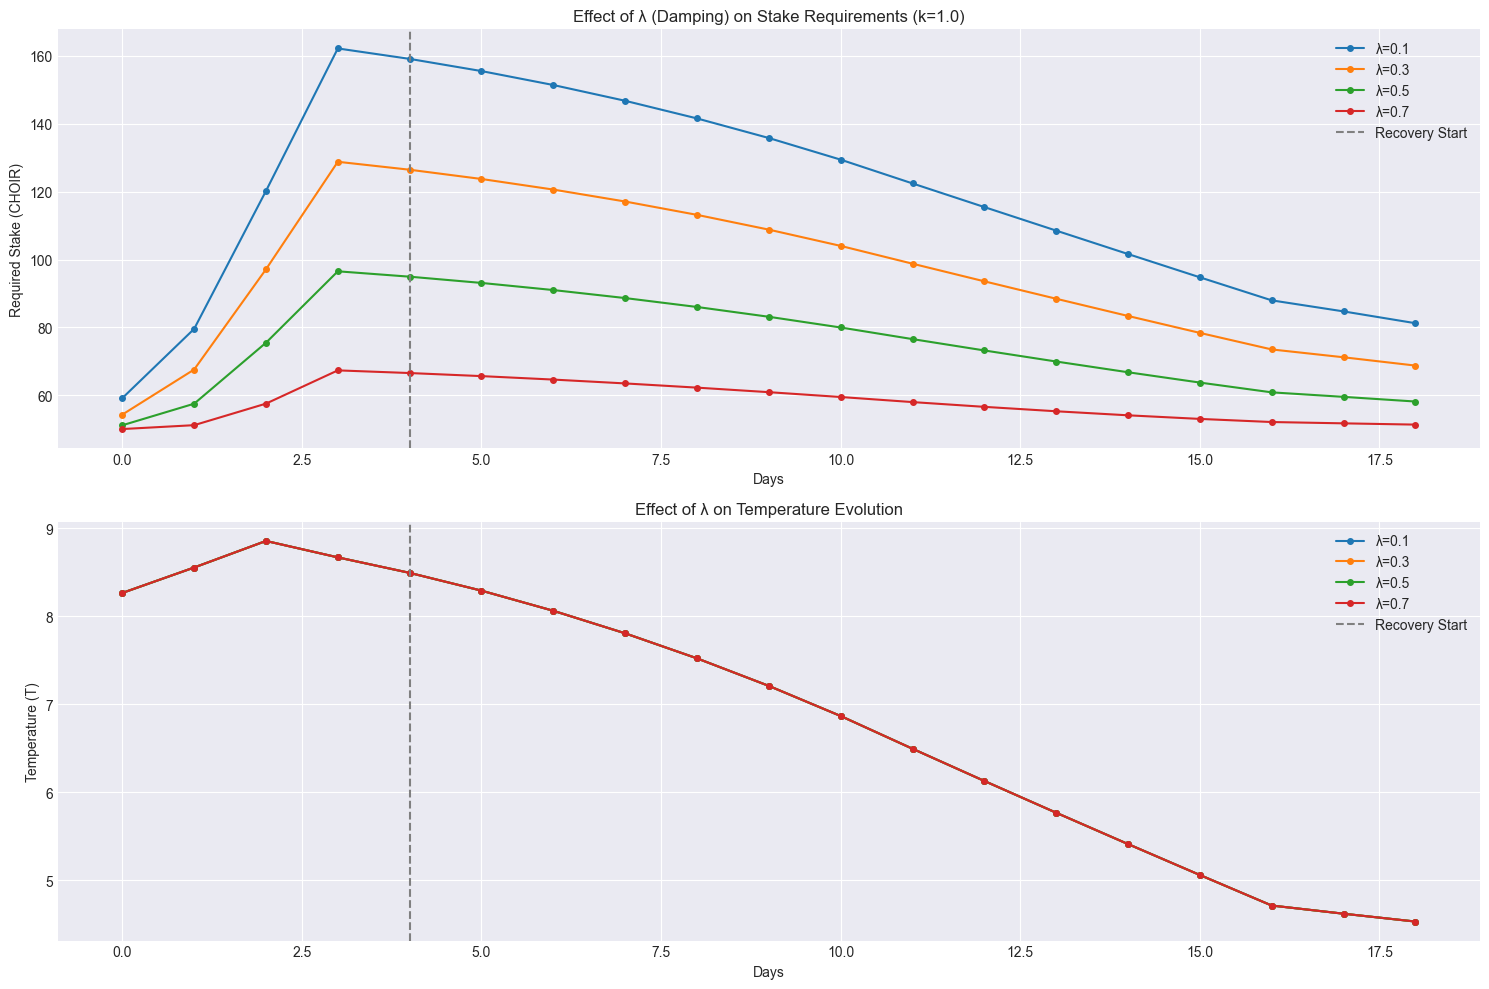

In [18]:
# Add to harmonic_curve.ipynb

def calculate_stake_required(thread: Thread, S0: float = 100, k: float = 1.0, λ: float = 0.1) -> float:
    """Calculate required stake with explicit k and λ parameters"""
    ω = calculate_thread_frequency(thread)
    T = calculate_thread_temperature(thread)

    # k affects coupling strength
    ω_coupled = k * ω

    # λ affects temperature dissipation
    T_damped = T * (1 - λ)

    exp_term = np.exp(ω_coupled/T_damped) - 1
    if exp_term <= 0:
        return S0 * 0.5

    stake = S0 * (0.5 + 1/exp_term)
    return min(stake, S0 * 5.0)

def model_fast_cascade_and_recovery(thread: Thread, exit_sequence: list[int], k: float = 1.0, λ: float = 0.1, recovery_days: int = 15):
    """Model rapid cascade and recovery with coupling (k) and damping (λ) parameters"""
    timeline = {}
    current_thread = thread

    # Fast cascade (1 day between exits)
    for day, exits in enumerate(exit_sequence):
        current_thread = Thread(
            message_rate=max(current_thread.message_rate * 0.3, 0.1),
            co_author_count=current_thread.co_author_count - exits,
            token_balance=current_thread.token_balance,
            approval_rate=max(current_thread.approval_rate - 0.1, 0.5),
            age_days=current_thread.age_days + 1
        )

        stake = calculate_stake_required(current_thread, k=k, λ=λ)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        timeline[f"cascade_{day}"] = {
            "day": day,
            "stake": stake,
            "frequency": ω,
            "temperature": T,
            "co_authors": current_thread.co_author_count,
            "phase": "cascade"
        }

    cascade_end = len(exit_sequence)

    # Fast recovery (1 day intervals)
    for day in range(recovery_days):
        recovery_factor = min(1.0, day/7)  # Full recovery possible in 7 days

        current_thread = Thread(
            message_rate=max(0.1, current_thread.message_rate * (1 + 0.3 * recovery_factor)),
            co_author_count=current_thread.co_author_count,
            token_balance=current_thread.token_balance,
            approval_rate=min(0.95, current_thread.approval_rate + 0.05 * recovery_factor),
            age_days=current_thread.age_days + 1
        )

        stake = calculate_stake_required(current_thread, k=k, λ=λ)
        ω = calculate_thread_frequency(current_thread)
        T = calculate_thread_temperature(current_thread)

        timeline[f"recovery_{day}"] = {
            "day": cascade_end + day,
            "stake": stake,
            "frequency": ω,
            "temperature": T,
            "co_authors": current_thread.co_author_count,
            "phase": "recovery"
        }

    return timeline

# Test different λ values with fixed k
def model_lambda_comparison(initial_thread, exit_sequence, lambdas=[0.1, 0.3, 0.5, 0.7]):
    """Compare different λ values with fixed k=1.0"""
    results = {}

    for λ in lambdas:
        timeline = model_fast_cascade_and_recovery(
            initial_thread,
            exit_sequence,
            k=1.0,  # Fixed coupling
            λ=λ     # Variable damping
        )
        results[f"λ={λ}"] = timeline

    # Visualization
    plt.figure(figsize=(15, 10))

    # Plot stake requirements for different λ values
    plt.subplot(2, 1, 1)
    for label, timeline in results.items():
        days = [data["day"] for data in timeline.values()]
        stakes = [data["stake"] for data in timeline.values()]
        plt.plot(days, stakes, '-o', label=label, markersize=4)

    plt.axvline(x=len(exit_sequence), color='gray', linestyle='--', label='Recovery Start')
    plt.xlabel('Days')
    plt.ylabel('Required Stake (CHOIR)')
    plt.title('Effect of λ (Damping) on Stake Requirements (k=1.0)')
    plt.legend()
    plt.grid(True)

    # Plot temperature evolution
    plt.subplot(2, 1, 2)
    for label, timeline in results.items():
        days = [data["day"] for data in timeline.values()]
        temps = [data["temperature"] for data in timeline.values()]
        plt.plot(days, temps, '-o', label=label, markersize=4)

    plt.axvline(x=len(exit_sequence), color='gray', linestyle='--', label='Recovery Start')
    plt.xlabel('Days')
    plt.ylabel('Temperature (T)')
    plt.title('Effect of λ on Temperature Evolution')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Test with initial conditions
initial_thread = Thread(
    message_rate=10,
    co_author_count=10,
    token_balance=10000,
    approval_rate=0.8,
    age_days=30
)

exit_sequence = [2, 3, 2, 1]
model_lambda_comparison(initial_thread, exit_sequence)

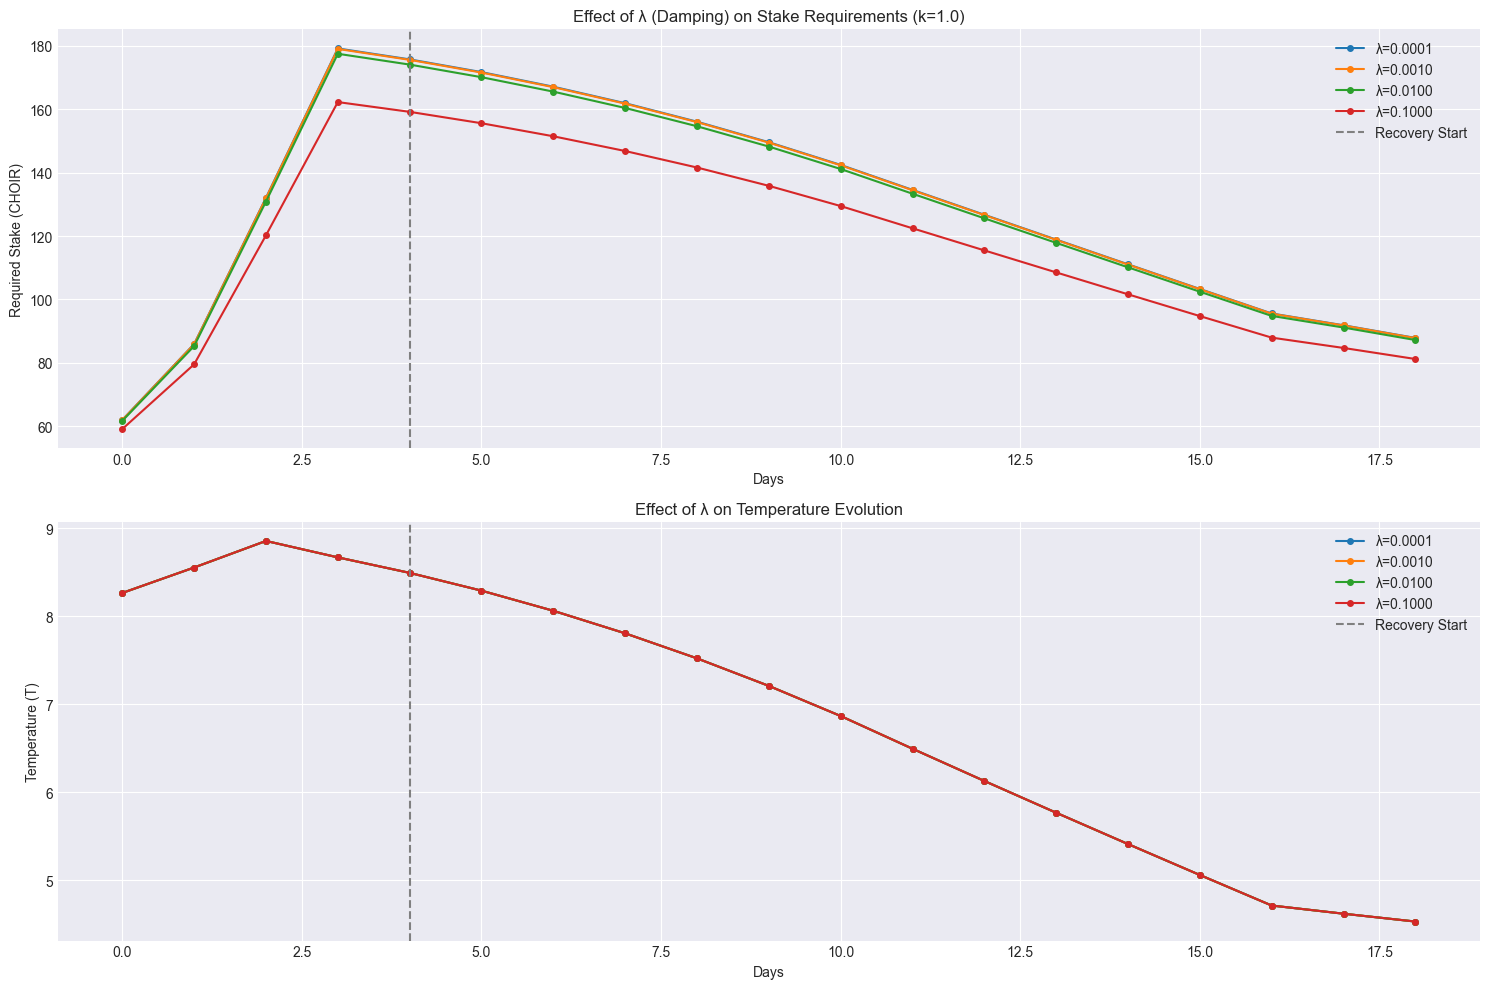


Damping Factor (λ) Analysis with k=1.0:
--------------------------------------------------

λ=0.0001:
Peak stake: 179.11 CHOIR
Final stake: 87.89 CHOIR
Recovery time: 0 days
Final temperature: 4.53

λ=0.0010:
Peak stake: 178.95 CHOIR
Final stake: 87.83 CHOIR
Recovery time: 0 days
Final temperature: 4.53

λ=0.0100:
Peak stake: 177.43 CHOIR
Final stake: 87.23 CHOIR
Recovery time: 0 days
Final temperature: 4.53

λ=0.1000:
Peak stake: 162.21 CHOIR
Final stake: 81.25 CHOIR
Recovery time: 0 days
Final temperature: 4.53


In [19]:
# Add to harmonic_curve.ipynb

# Test different λ values with fixed k
def model_lambda_comparison(initial_thread, exit_sequence, lambdas=[0.0001, 0.001, 0.01, 0.1]):
    """Compare different λ values with fixed k=1.0"""
    results = {}

    for λ in lambdas:
        timeline = model_fast_cascade_and_recovery(
            initial_thread,
            exit_sequence,
            k=1.0,  # Fixed coupling
            λ=λ     # Much smaller damping values
        )
        results[f"λ={λ:.4f}"] = timeline

    # Visualization
    plt.figure(figsize=(15, 10))

    # Plot stake requirements for different λ values
    plt.subplot(2, 1, 1)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    for (label, timeline), color in zip(results.items(), colors):
        days = [data["day"] for data in timeline.values()]
        stakes = [data["stake"] for data in timeline.values()]
        plt.plot(days, stakes, '-o', label=label, color=color, markersize=4)

    plt.axvline(x=len(exit_sequence), color='gray', linestyle='--', label='Recovery Start')
    plt.xlabel('Days')
    plt.ylabel('Required Stake (CHOIR)')
    plt.title('Effect of λ (Damping) on Stake Requirements (k=1.0)')
    plt.legend()
    plt.grid(True)

    # Plot temperature evolution
    plt.subplot(2, 1, 2)
    for (label, timeline), color in zip(results.items(), colors):
        days = [data["day"] for data in timeline.values()]
        temps = [data["temperature"] for data in timeline.values()]
        plt.plot(days, temps, '-o', label=label, color=color, markersize=4)

    plt.axvline(x=len(exit_sequence), color='gray', linestyle='--', label='Recovery Start')
    plt.xlabel('Days')
    plt.ylabel('Temperature (T)')
    plt.title('Effect of λ on Temperature Evolution')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print analysis
    print("\nDamping Factor (λ) Analysis with k=1.0:")
    print("-" * 50)
    for label, timeline in results.items():
        data = list(timeline.values())
        print(f"\n{label}:")
        print(f"Peak stake: {max(d['stake'] for d in data):.2f} CHOIR")
        print(f"Final stake: {data[-1]['stake']:.2f} CHOIR")
        print(f"Recovery time: {sum(1 for d in data if d['stake'] > 200)} days")
        print(f"Final temperature: {data[-1]['temperature']:.2f}")

# Test with initial conditions
initial_thread = Thread(
    message_rate=10,
    co_author_count=10,
    token_balance=10000,
    approval_rate=0.8,
    age_days=30
)

exit_sequence = [2, 3, 2, 1]
model_lambda_comparison(initial_thread, exit_sequence)